# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the data set

In [2]:
train_data = pd.read_csv("Titanic_train.csv")
test_data = pd.read_csv("Titanic_test.csv")

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


### Null Values

In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
null_features_train = [feature for feature in train_data.columns if train_data[feature].isnull().sum() >= 1]
null_features_test = [feature for feature in test_data.columns if test_data[feature].isnull().sum() >= 1]

In [10]:
null_features_train

['Age', 'Cabin', 'Embarked']

In [11]:
null_features_test

['Age', 'Fare', 'Cabin']

### Percentage of null values

In [12]:
def calculate_null_percentage(data, null_features):
    """
    Calculate and print the percentage of null values for specified features.

    Parameters:
    - data (pd.DataFrame): The dataset containing the features.
    - null_features (list): List of feature names to calculate null percentages for.

    Returns:
    None
    """
    total_rows = data.shape[0]

    for feature in null_features:
        null_count = data[feature].isnull().sum()
        null_percentage = (null_count / total_rows) * 100
        print(f"Null values in the column '{feature}' is {round(null_percentage, 2)}%")
        print("-" * 60)


In [13]:
calculate_null_percentage(data= train_data,
                          null_features= null_features_train)

Null values in the column 'Age' is 19.87%
------------------------------------------------------------
Null values in the column 'Cabin' is 77.1%
------------------------------------------------------------
Null values in the column 'Embarked' is 0.22%
------------------------------------------------------------


In [14]:
calculate_null_percentage(data= test_data,
                          null_features= null_features_test)

Null values in the column 'Age' is 20.57%
------------------------------------------------------------
Null values in the column 'Fare' is 0.24%
------------------------------------------------------------
Null values in the column 'Cabin' is 78.23%
------------------------------------------------------------


### Observation
- More than 77% values in Caabin column are null
- It will be best to drop this column rather than handling the null values

### Dropping the Cabin column

In [15]:
train_data.drop('Cabin', axis= 1, inplace= True)

In [16]:
test_data.drop('Cabin', axis= 1, inplace= True)

In [17]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [18]:
null_features_train.remove('Cabin')

In [19]:
null_features_test.remove('Cabin')

In [20]:
null_features_test

['Age', 'Fare']

In [21]:
null_features_train

['Age', 'Embarked']

### Count Plot of the survied columns

In [22]:
def plot_countplot(data, column, palette='Set1', title=None, xlabel=None, ylabel='Count'):
    """
    Plot a countplot with custom styling.

    Parameters:
    - data (pd.DataFrame): The dataset containing the feature to plot.
    - column (str): The column name to plot on the x-axis.
    - palette (str): The color palette for the plot (default is 'Set1').
    - title (str): The title of the plot (default is None).
    - xlabel (str): Label for the x-axis (default is None).
    - ylabel (str): Label for the y-axis (default is 'Count').

    Returns:
    None
    """
    sns.set_style('whitegrid')
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=data, palette=palette)

    plt.title(title or f'Countplot of {column}', fontsize=14, fontweight='bold')
    plt.xlabel(xlabel or column, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

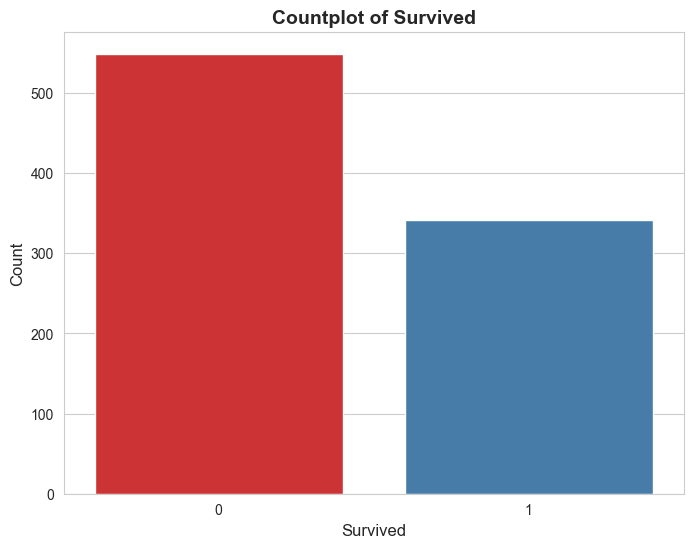

In [23]:
plot_countplot(data = train_data,
               column= 'Survived')

### Count Plot of the survied columns with respect to sex

In [24]:
def plot_countplot_with_hue(data, x_column, hue_column, palette='RdBu_r', title=None, xlabel=None, ylabel='Count'):
    """
    Plot a countplot with a hue for additional categorical differentiation.

    Parameters:
    - data (pd.DataFrame): The dataset containing the features to plot.
    - x_column (str): The column name to plot on the x-axis.
    - hue_column (str): The column name to differentiate categories by hue.
    - palette (str): The color palette for the plot (default is 'RdBu_r').
    - title (str): The title of the plot (default is None).
    - xlabel (str): Label for the x-axis (default is None).
    - ylabel (str): Label for the y-axis (default is 'Count').

    Returns:
    None
    """
    sns.set_style('whitegrid')
    plt.figure(figsize=(8, 6))
    sns.countplot(x=x_column, hue=hue_column, data=data, palette=palette)

    plt.title(title or f'{x_column.capitalize()} vs {hue_column.capitalize()}', fontsize=14, fontweight='bold')
    plt.xlabel(xlabel or x_column.capitalize(), fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title=hue_column.capitalize(), fontsize=10, title_fontsize=12)
    plt.show()

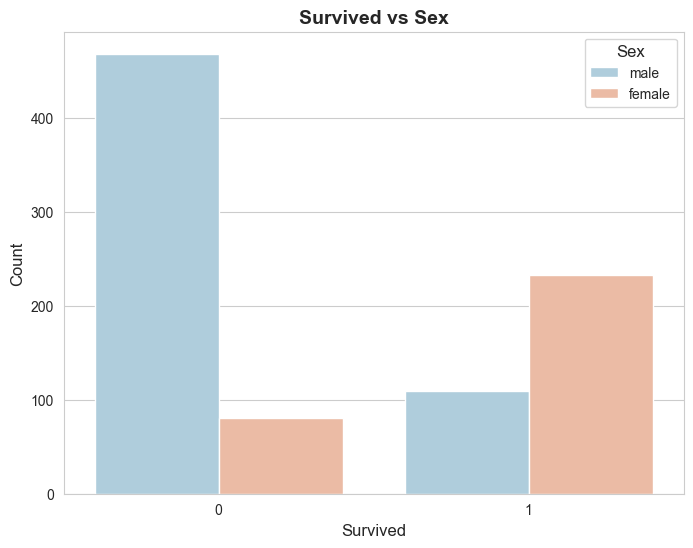

In [25]:
plot_countplot_with_hue(data= train_data,
                        x_column= 'Survived',
                        hue_column= 'Sex')

### Count Plot of the survied columns with respect to Plcass

In [26]:
def plot_countplot_with_plcass(data, x_column, hue_column, palette='rainbow', title=None, xlabel=None, ylabel='Count'):
    """
    Plot a countplot with a hue for additional categorical differentiation.

    Parameters:
    - data (pd.DataFrame): The dataset containing the features to plot.
    - x_column (str): The column name to plot on the x-axis.
    - hue_column (str): The column name to differentiate categories by hue.
    - palette (str): The color palette for the plot (default is 'rainbow').
    - title (str): The title of the plot (default is None).
    - xlabel (str): Label for the x-axis (default is None).
    - ylabel (str): Label for the y-axis (default is 'Count').

    Returns:
    None
    """
    sns.set_style('whitegrid')
    plt.figure(figsize=(8, 6))
    sns.countplot(x=x_column, hue=hue_column, data=data, palette=palette)

    plt.title(title or f'{x_column.capitalize()} vs {hue_column.capitalize()}', fontsize=14, fontweight='bold')
    plt.xlabel(xlabel or x_column.capitalize(), fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title=hue_column.capitalize(), fontsize=10, title_fontsize=12)
    plt.show()

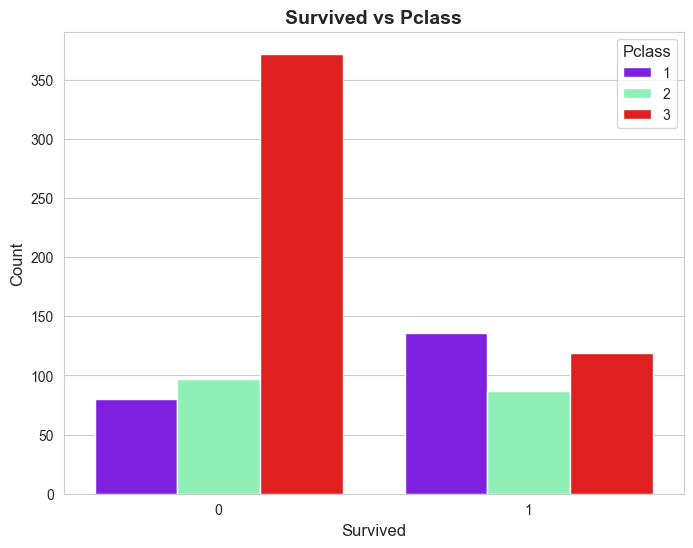

In [27]:
plot_countplot_with_plcass(data= train_data,
                           x_column= 'Survived',
                           hue_column= 'Pclass')

### Distribution plot of the age column

In [28]:
def plot_distribution(data, column, bins=40, kde=False, color='darkred', title=None, xlabel=None, ylabel='Frequency'):
    """
    Plot a distribution plot (histogram) for a numerical column.

    Parameters:
    - data (pd.DataFrame): The dataset containing the column to plot.
    - column (str): The numerical column to plot.
    - bins (int): Number of bins for the histogram (default is 40).
    - kde (bool): Whether to include a kernel density estimate (default is False).
    - color (str): Color of the histogram (default is 'darkred').
    - title (str): Title of the plot (default is None).
    - xlabel (str): Label for the x-axis (default is None).
    - ylabel (str): Label for the y-axis (default is 'Frequency').

    Returns:
    None
    """
    sns.set_style('whitegrid')
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column].dropna(), bins=bins, kde=kde, color=color)

    plt.title(title or f'Distribution of {column}', fontsize=14, fontweight='bold')
    plt.xlabel(xlabel or column, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

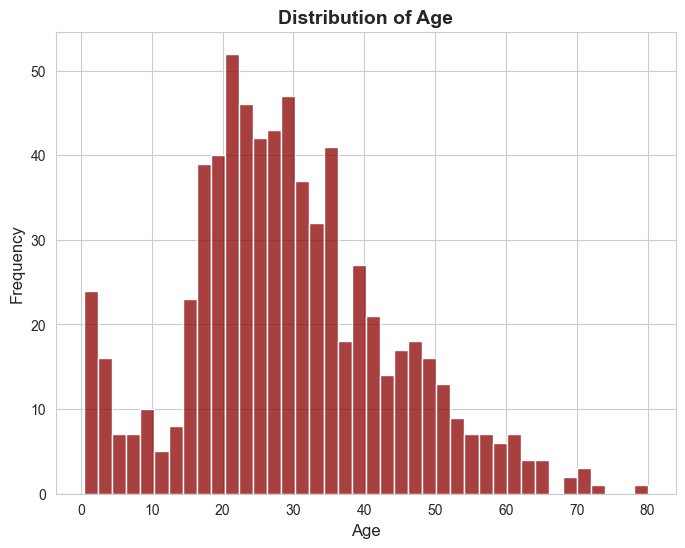

In [29]:
plot_distribution(data= train_data,
                  column= 'Age')

### Handeling the null values

In [30]:
null_features_train

['Age', 'Embarked']

In [31]:
null_features_test

['Age', 'Fare']

### Age

### Box plot wiht respect to Pclasses

In [32]:
def plot_boxplot_with_median(data, x_column, y_column, palette='winter', title=None, xlabel=None, ylabel=None):
    """
    Plot a boxplot for visualizing distributions and highlight median values.

    Parameters:
    - data (pd.DataFrame): The dataset containing the features to plot.
    - x_column (str): The categorical column to plot on the x-axis.
    - y_column (str): The numerical column to plot on the y-axis.
    - palette (str): Color palette for the boxplot (default is 'winter').
    - title (str): Title of the plot (default is None).
    - xlabel (str): Label for the x-axis (default is None).
    - ylabel (str): Label for the y-axis (default is None).

    Returns:
    None
    """
    sns.set_style('whitegrid')
    plt.figure(figsize=(12, 7))

    ax = sns.boxplot(x=x_column, y=y_column, data=data, palette=palette)

    medians = data.groupby(x_column)[y_column].median()
    for i, median in enumerate(medians):
        ax.text(i, median, f'{median:.1f}', color='black', ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.title(title or f'{y_column} Distribution by {x_column}', fontsize=16, fontweight='bold')
    plt.xlabel(xlabel or x_column, fontsize=14)
    plt.ylabel(ylabel or y_column, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.show()


### Training data

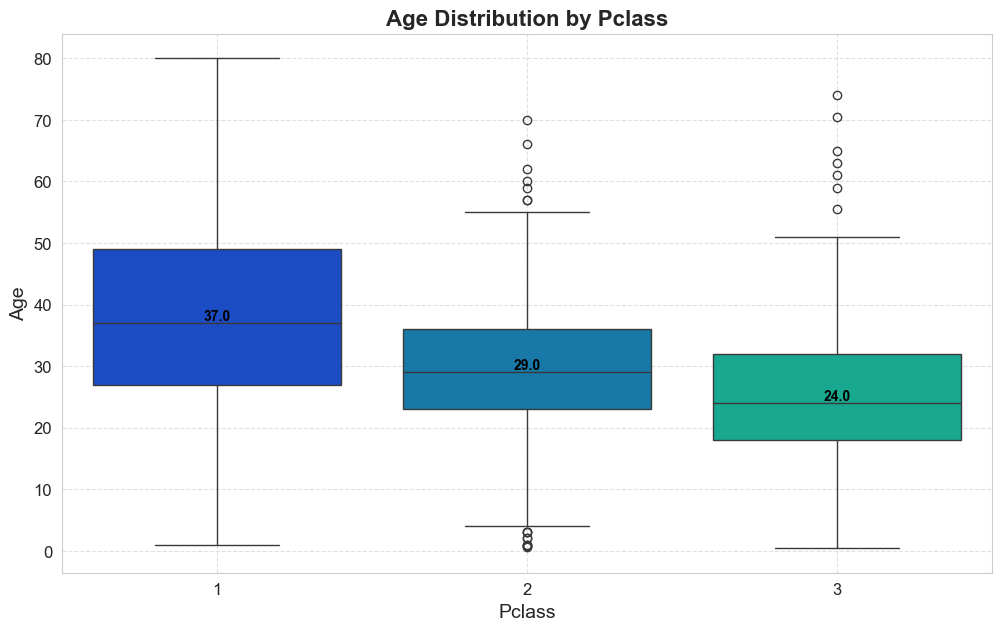

In [33]:
plot_boxplot_with_median(data = train_data,
                         x_column= 'Pclass',
                         y_column= 'Age')

### Testing data

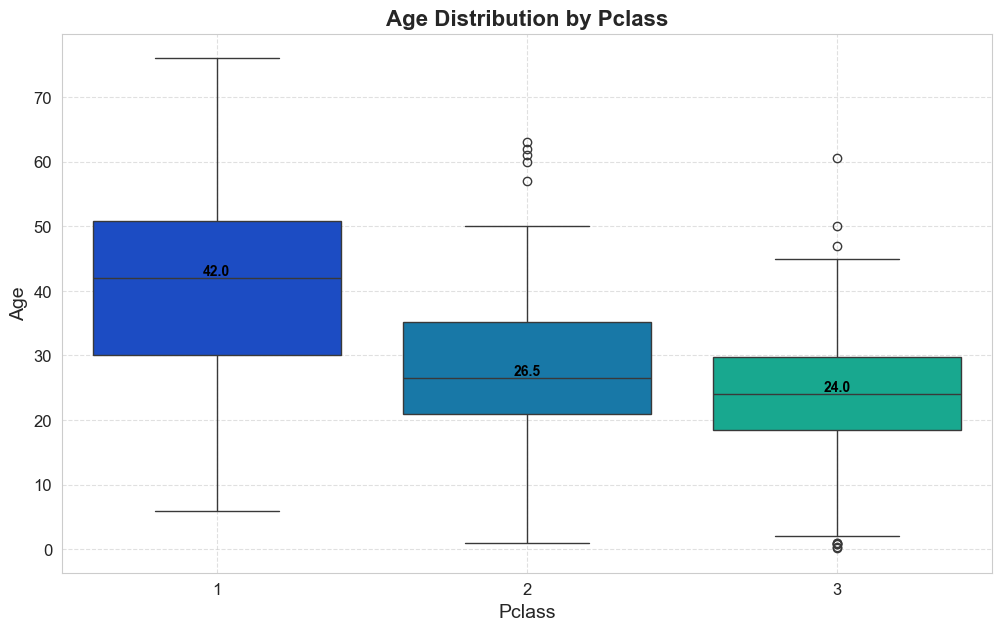

In [34]:
plot_boxplot_with_median(data= test_data,
                         x_column='Pclass',
                         y_column='Age')

- We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

- Passengers median age is varying highly with different passenger classes

- So we need to fill the null age values according to passenger classes

- We will replace the null age value of the passenger which have pclass as 1 with 37 , pclass as 2 with 29, pclass as 3 with 24 in training data

- We will replace the null age value of the passenger which have pclass as 1 with 42 , pclass as 2 with 26.5, pclass as 3 with 24 in testing data

---

### Function to impute the null age values

In [35]:
def impute_age_train(cols):
    """
    Impute missing age values based on passenger class.
    
    Parameters:
    - cols (tuple): A tuple containing the 'Age' and 'Pclass' values for a passenger.
        - cols[0] is the 'Age' value.
        - cols[1] is the 'Pclass' value.
    
    Returns:
    - float: The imputed age value.
    """
    age, pclass = cols
    
    if pd.isnull(age):
        if pclass == 1:
            return 37  # Imputed age for 1st class passengers
        elif pclass == 2:
            return 29  # Imputed age for 2nd class passengers
        else:
            return 24  # Imputed age for 3rd class passengers
    else:
        return age

In [36]:
def impute_age_test(cols):
    """
    Impute missing age values based on passenger class.
    
    Parameters:
    - cols (tuple): A tuple containing the 'Age' and 'Pclass' values for a passenger.
        - cols[0] is the 'Age' value.
        - cols[1] is the 'Pclass' value.
    
    Returns:
    - float: The imputed age value.
    """
    age, pclass = cols
    
    if pd.isnull(age):
        if pclass == 1:
            return 42  # Imputed age for 1st class passengers
        elif pclass == 2:
            return 29  # Imputed age for 2nd class passengers
        else:
            return 24  # Imputed age for 3rd class passengers
    else:
        return age

### Training data imputation

In [37]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age_train,axis=1)

### Testing data imputation

In [38]:
test_data['Age'] = test_data[['Age','Pclass']].apply(impute_age_test, axis=1)

In [39]:
train_data['Age'].isnull().sum()

np.int64(0)

In [40]:
test_data['Age'].isnull().sum()

np.int64(0)

- no null values now

### Handling the missing values of Embarked column

In [41]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [42]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [43]:
train_data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

- we will use this mode to replace the null values

In [44]:
train_data['Embarked'].mode()[0]

'S'

In [45]:
mode = train_data['Embarked'].mode()[0]

In [46]:
mode

'S'

In [47]:
train_data['Embarked'].fillna(value= mode,inplace=True)

In [48]:
train_data['Embarked'].isnull().sum()

np.int64(0)

- null values are no longer present in the data set

### Handeling fare null values in test data

In [49]:
test_data['Fare'].isnull().sum()

np.int64(1)

In [50]:
median_val = test_data['Fare'].median()

In [51]:
test_data['Fare'].fillna(value= median_val, inplace= True)

In [52]:
test_data['Fare'].isnull().sum()

np.int64(0)

Features Name,Ticket,PassengerId won't provide any meaningful information the prediction, so we can drop them

In [53]:
train_data.drop(['Name','Ticket','PassengerId'], axis= 1, inplace= True)

In [54]:
test_data.drop(['Name','Ticket','PassengerId'], axis= 1, inplace= True)

### Data Visualization

#### Spliting the data features

In [55]:
numerical_features_train = [feature for feature in train_data.columns if train_data[feature].dtype != 'O']

In [56]:
numerical_features_test = [feature for feature in test_data.columns if test_data[feature].dtype != 'O']

In [57]:
numerical_features_train

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [58]:
numerical_features_test

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [59]:
categorical_features_train = [feature for feature in train_data.columns if train_data[feature].dtype == 'O']

In [60]:
categorical_features_test = [feature for feature in test_data.columns if test_data[feature].dtype == 'O']

In [61]:
categorical_features_train

['Sex', 'Embarked']

In [62]:
categorical_features_test

['Sex', 'Embarked']

### Numerical features

### Histograms

In [63]:
def create_histograms(data, features, figsize=(20, 12)):
    """
    Create histograms with KDE and mean/median lines for given numerical features.

    Parameters:
    - data (pd.DataFrame): The dataset containing numerical features.
    - features (list): A list of column names to plot histograms for.
    - figsize (tuple): The size of the figure (default is (20, 12)).

    Returns:
    None
    """
    plt.style.use('seaborn-v0_8-darkgrid')
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle('Distribution of Numerical Features', fontsize=18, y=1.02)
    
    for idx, feature in enumerate(features):
        row, col = divmod(idx, n_cols)
        ax = axes[row, col] if n_rows > 1 else axes[col]
        sns.histplot(data=data, x=feature, kde=True, ax=ax, color='skyblue', edgecolor='black', alpha=0.7)
        mean_val, median_val = data[feature].mean(), data[feature].median()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_val:.2f}')
        ax.set_title(f'{feature} Distribution', fontsize=14)
        ax.set_xlabel(feature, fontsize=12)
        ax.set_ylabel('Count', fontsize=12)
        ax.legend(fontsize=10)
    
    for idx in range(n_features, n_rows * n_cols):
        row, col = divmod(idx, n_cols)
        fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])
    
    plt.tight_layout()

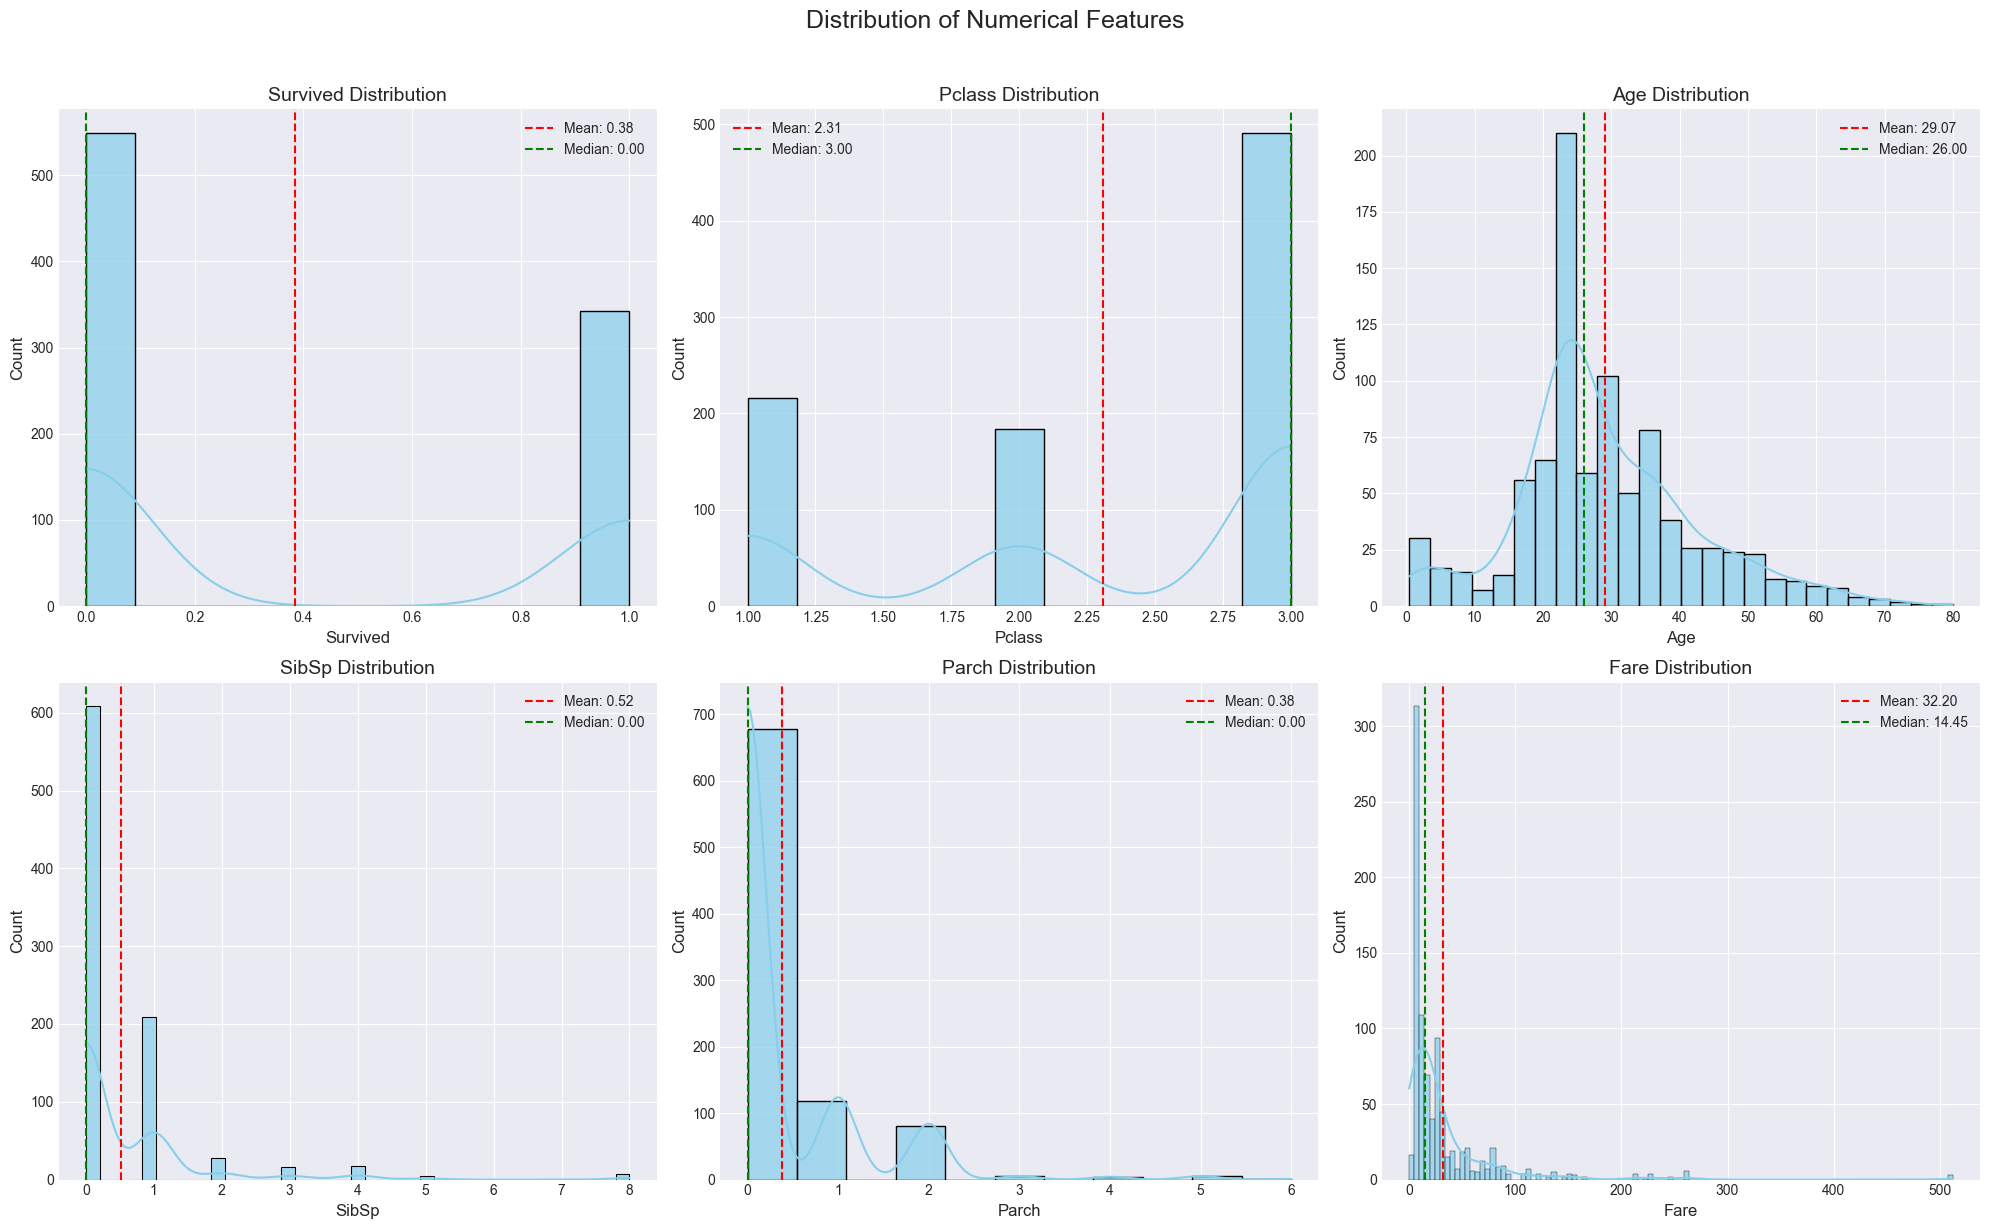

In [64]:
create_histograms(data= train_data,
                  features= numerical_features_train)

### BoxPlots

In [65]:
def create_boxplots(data, features, figsize=(20, 12)):
    """
    Create boxplots for given numerical features to visualize distribution and outliers.

    Parameters:
    - data (pd.DataFrame): The dataset containing numerical features.
    - features (list): A list of column names to plot boxplots for.
    - figsize (tuple): The size of the figure (default is (20, 12)).

    Returns:
    None
    """
    plt.style.use('seaborn-v0_8-darkgrid')
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle('Boxplots of Numerical Features', fontsize=18, y=1.02)
    
    for idx, feature in enumerate(features):
        row, col = divmod(idx, n_cols)
        ax = axes[row, col] if n_rows > 1 else axes[col]
        sns.boxplot(data=data, x=feature, ax=ax, color='lightgreen', linewidth=1.5)
        ax.set_title(f'{feature} Boxplot', fontsize=14)
        ax.set_xlabel(feature, fontsize=12)
        ax.set_ylabel('Values', fontsize=12)
    
    for idx in range(n_features, n_rows * n_cols):
        row, col = divmod(idx, n_cols)
        fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])
    
    plt.tight_layout()

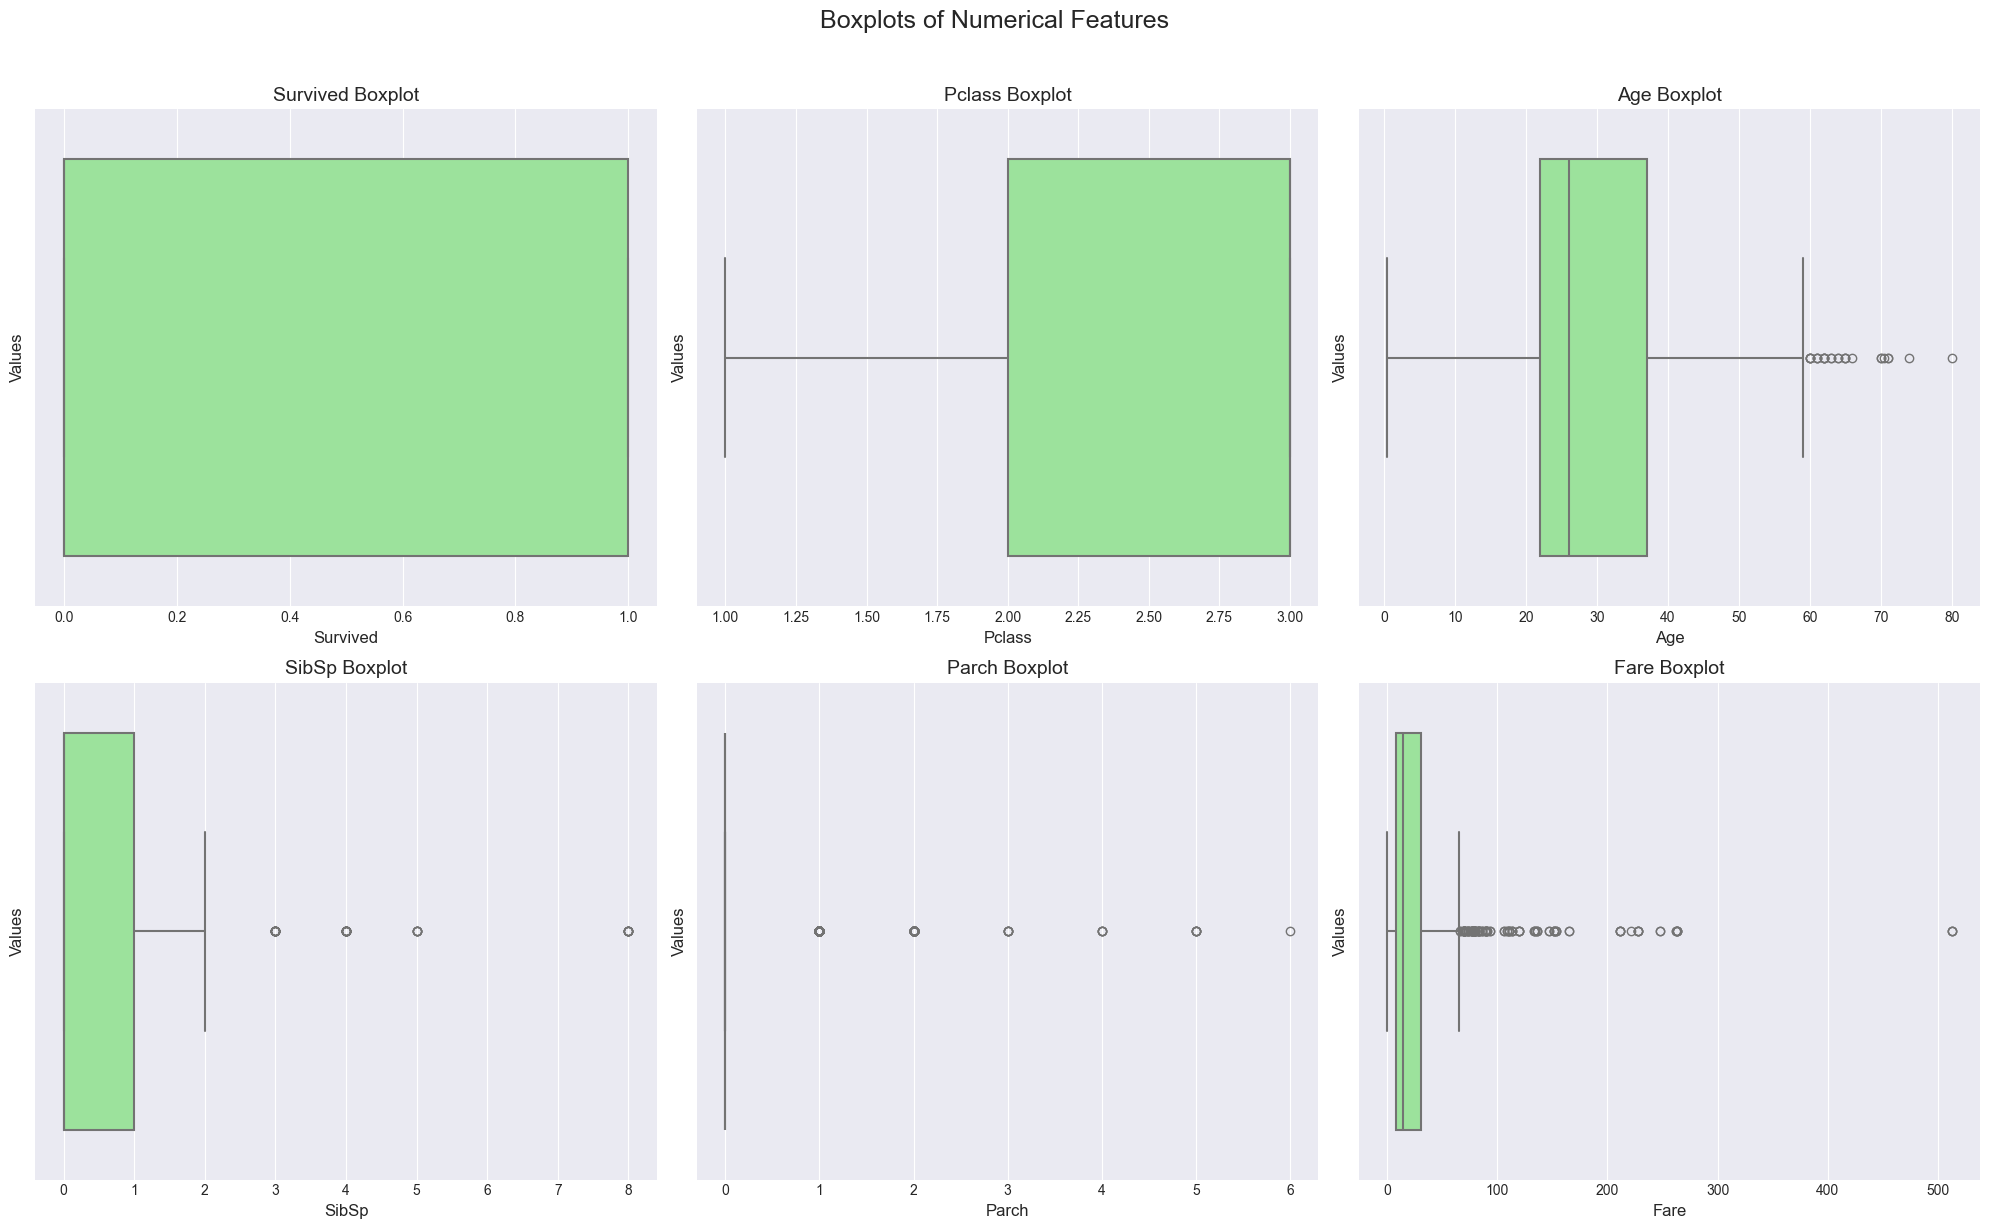

In [66]:
create_boxplots(data= train_data,
                features= numerical_features_train)

### Heatmap

In [67]:
def create_heatmap(correlation_matrix, figsize=(8, 6)):
    """
    Create a heatmap of the correlation matrix.

    Parameters:
    - correlation_matrix (pd.DataFrame): The correlation matrix to visualize.
    - figsize (tuple): The size of the figure (default is (8, 6)).

    Returns:
    None
    """
    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', annot_kws={'size': 12})
    plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
    plt.tight_layout()

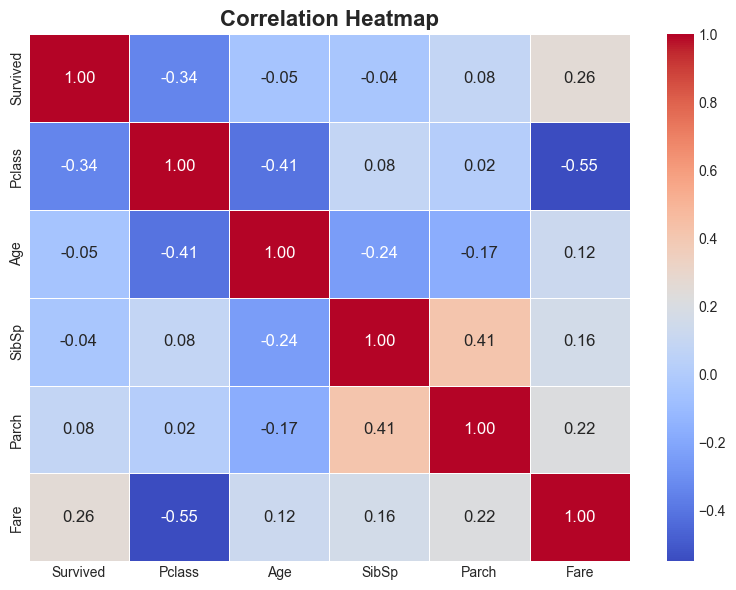

In [68]:
correlation_matrix = train_data[numerical_features_train].corr()
create_heatmap(correlation_matrix)

### Pairplot

In [69]:
def create_pairplot(data, features, figsize=(12, 12)):
    """
    Create a pairplot to visualize relationships between numerical features.

    Parameters:
    - data (pd.DataFrame): The dataset containing numerical features.
    - features (list): A list of column names to plot in the pairplot.
    - figsize (tuple): The size of the figure (default is (12, 12)).

    Returns:
    None
    """
    sns.set(style='whitegrid')
    sns.pairplot(data[features], diag_kind='kde', plot_kws={'alpha': 0.6}, height=3)
    plt.suptitle('Pairplot of Numerical Features', fontsize=16, y=1.02)
    plt.tight_layout()

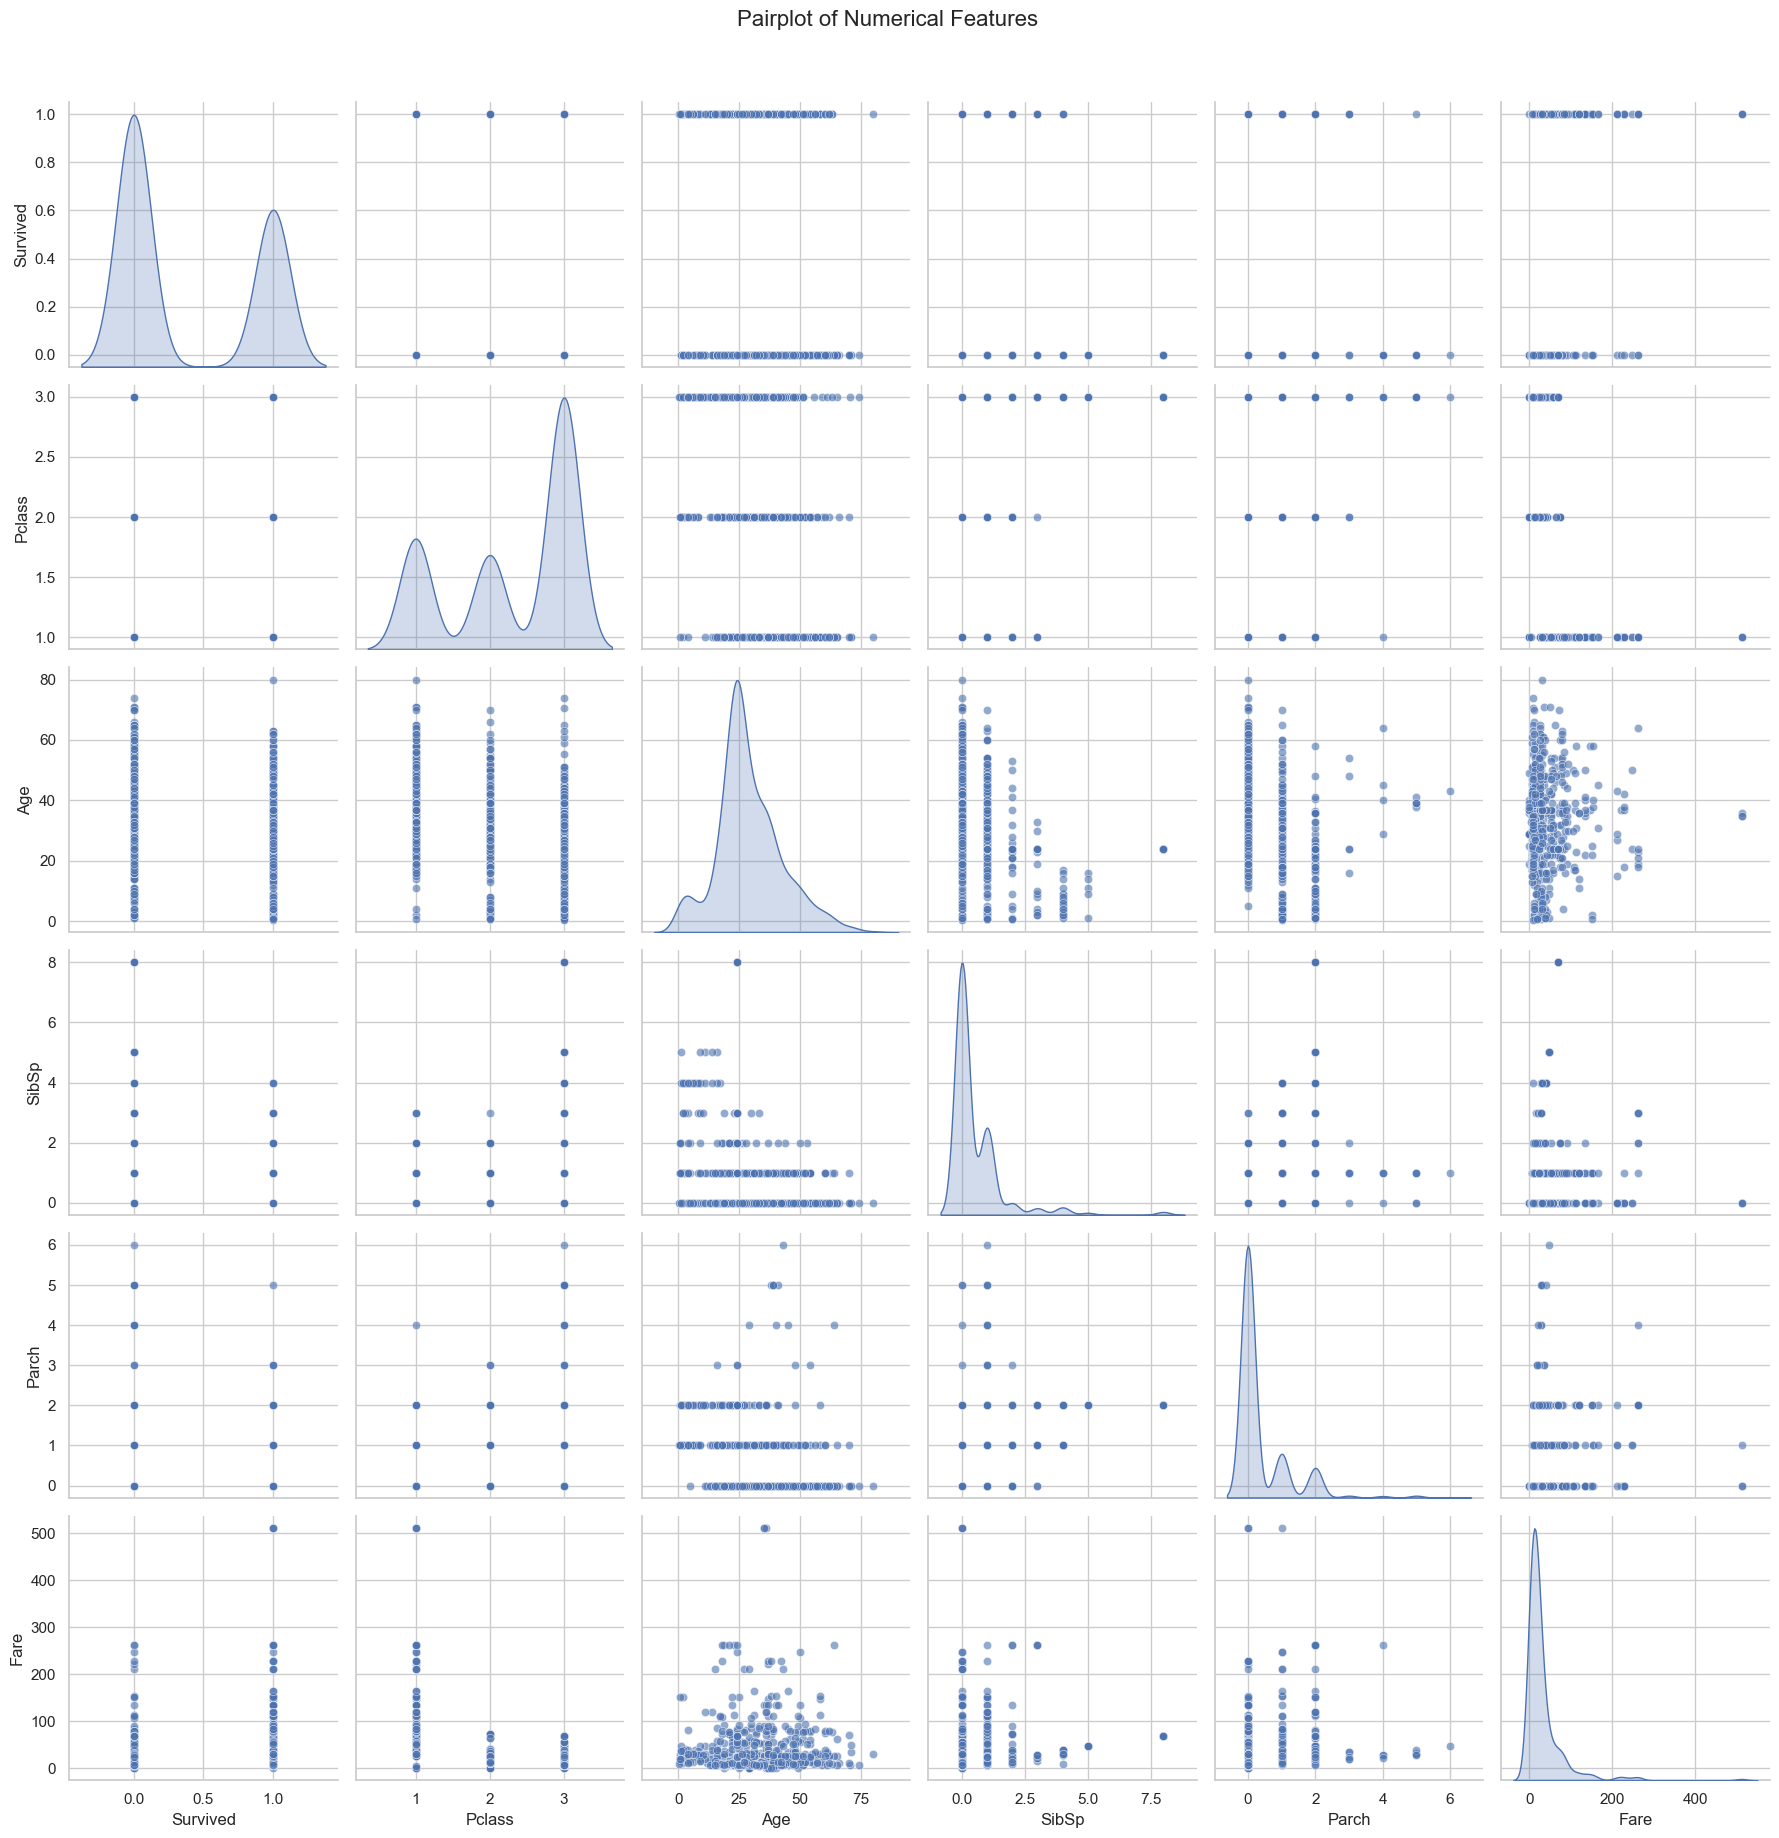

In [70]:
create_pairplot(data= train_data,
                features= numerical_features_train)

### Categorical Features

### Bar graphs

In [71]:
def create_bar_graph(data, features, figsize=(10, 6)):
    """
    Create bar plots for categorical features.

    Parameters:
    - data (pd.DataFrame): The dataset containing categorical features.
    - features (list): A list of categorical column names to plot bar graphs for.
    - figsize (tuple): The size of the figure (default is (10, 6)).

    Returns:
    None
    """
    plt.style.use('seaborn-v0_8-darkgrid')
    n_features = len(features)
    n_cols = 2
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle('Bar Graphs for Categorical Features', fontsize=18, y=1.02)
    
    for idx, feature in enumerate(features):
        row, col = divmod(idx, n_cols)
        ax = axes[row, col] if n_rows > 1 else axes[col]
        sns.countplot(data=data, x=feature, ax=ax, palette='Set1', edgecolor='black')
        ax.set_title(f'{feature} Count', fontsize=14)
        ax.set_xlabel(feature, fontsize=12)
        ax.set_ylabel('Count', fontsize=12)
    
    for idx in range(n_features, n_rows * n_cols):
        row, col = divmod(idx, n_cols)
        fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])
    
    plt.tight_layout()

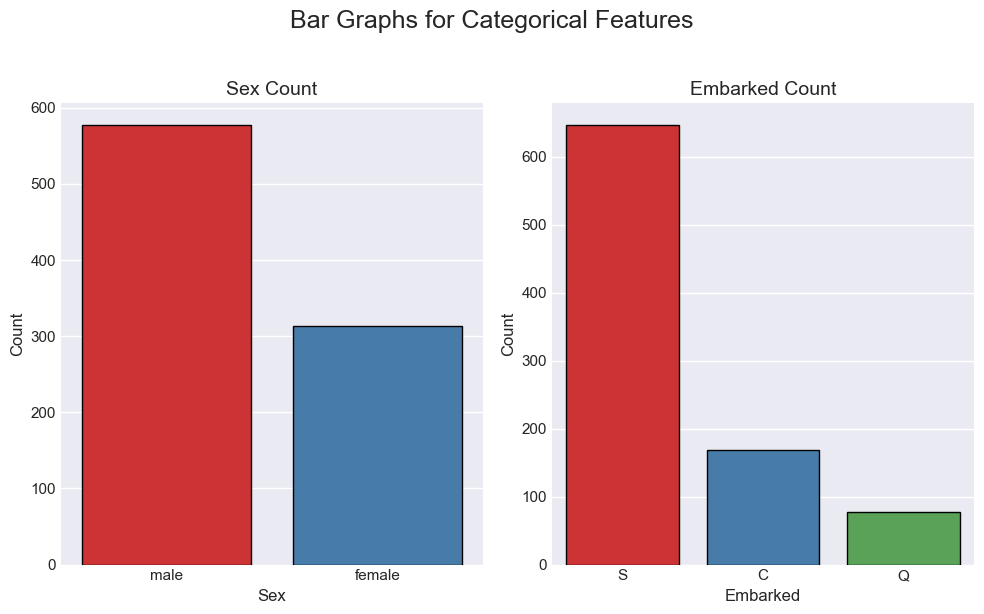

In [72]:
create_bar_graph(data= train_data,
                 features= categorical_features_train)

### Stacked Bar graph

In [73]:
def plot_stacked_bar(data, features, target, figsize=(20, 12)):
    """
    Plot stacked bar charts for each categorical feature vs target variable.

    Parameters:
    - data (pd.DataFrame): The dataset containing categorical features.
    - features (list): A list of categorical column names to plot.
    - target (str): The target variable for stacking in the bar plot.
    - figsize (tuple): The size of the figure (default is (20, 12)).

    Returns:
    None
    """
    n_features = len(features)
    fig, axes = plt.subplots(n_features, 1, figsize=figsize)
    fig.suptitle(f'Stacked Bar Plots for {target} vs Categorical Features', fontsize=18, y=1.02)

    for idx, feature in enumerate(features):
        pd.crosstab(data[feature], data[target]).plot(kind='bar', stacked=True, color=['#FF6347', '#4682B4'],
                                                       ax=axes[idx], edgecolor='black')
        axes[idx].set_title(f'{feature} vs {target} - Stacked Bar', fontsize=14)
        axes[idx].set_xlabel(feature, fontsize=12)
        axes[idx].set_ylabel('Count', fontsize=12)
        axes[idx].legend(title=target, fontsize=10)
    
    plt.tight_layout()
    plt.show()

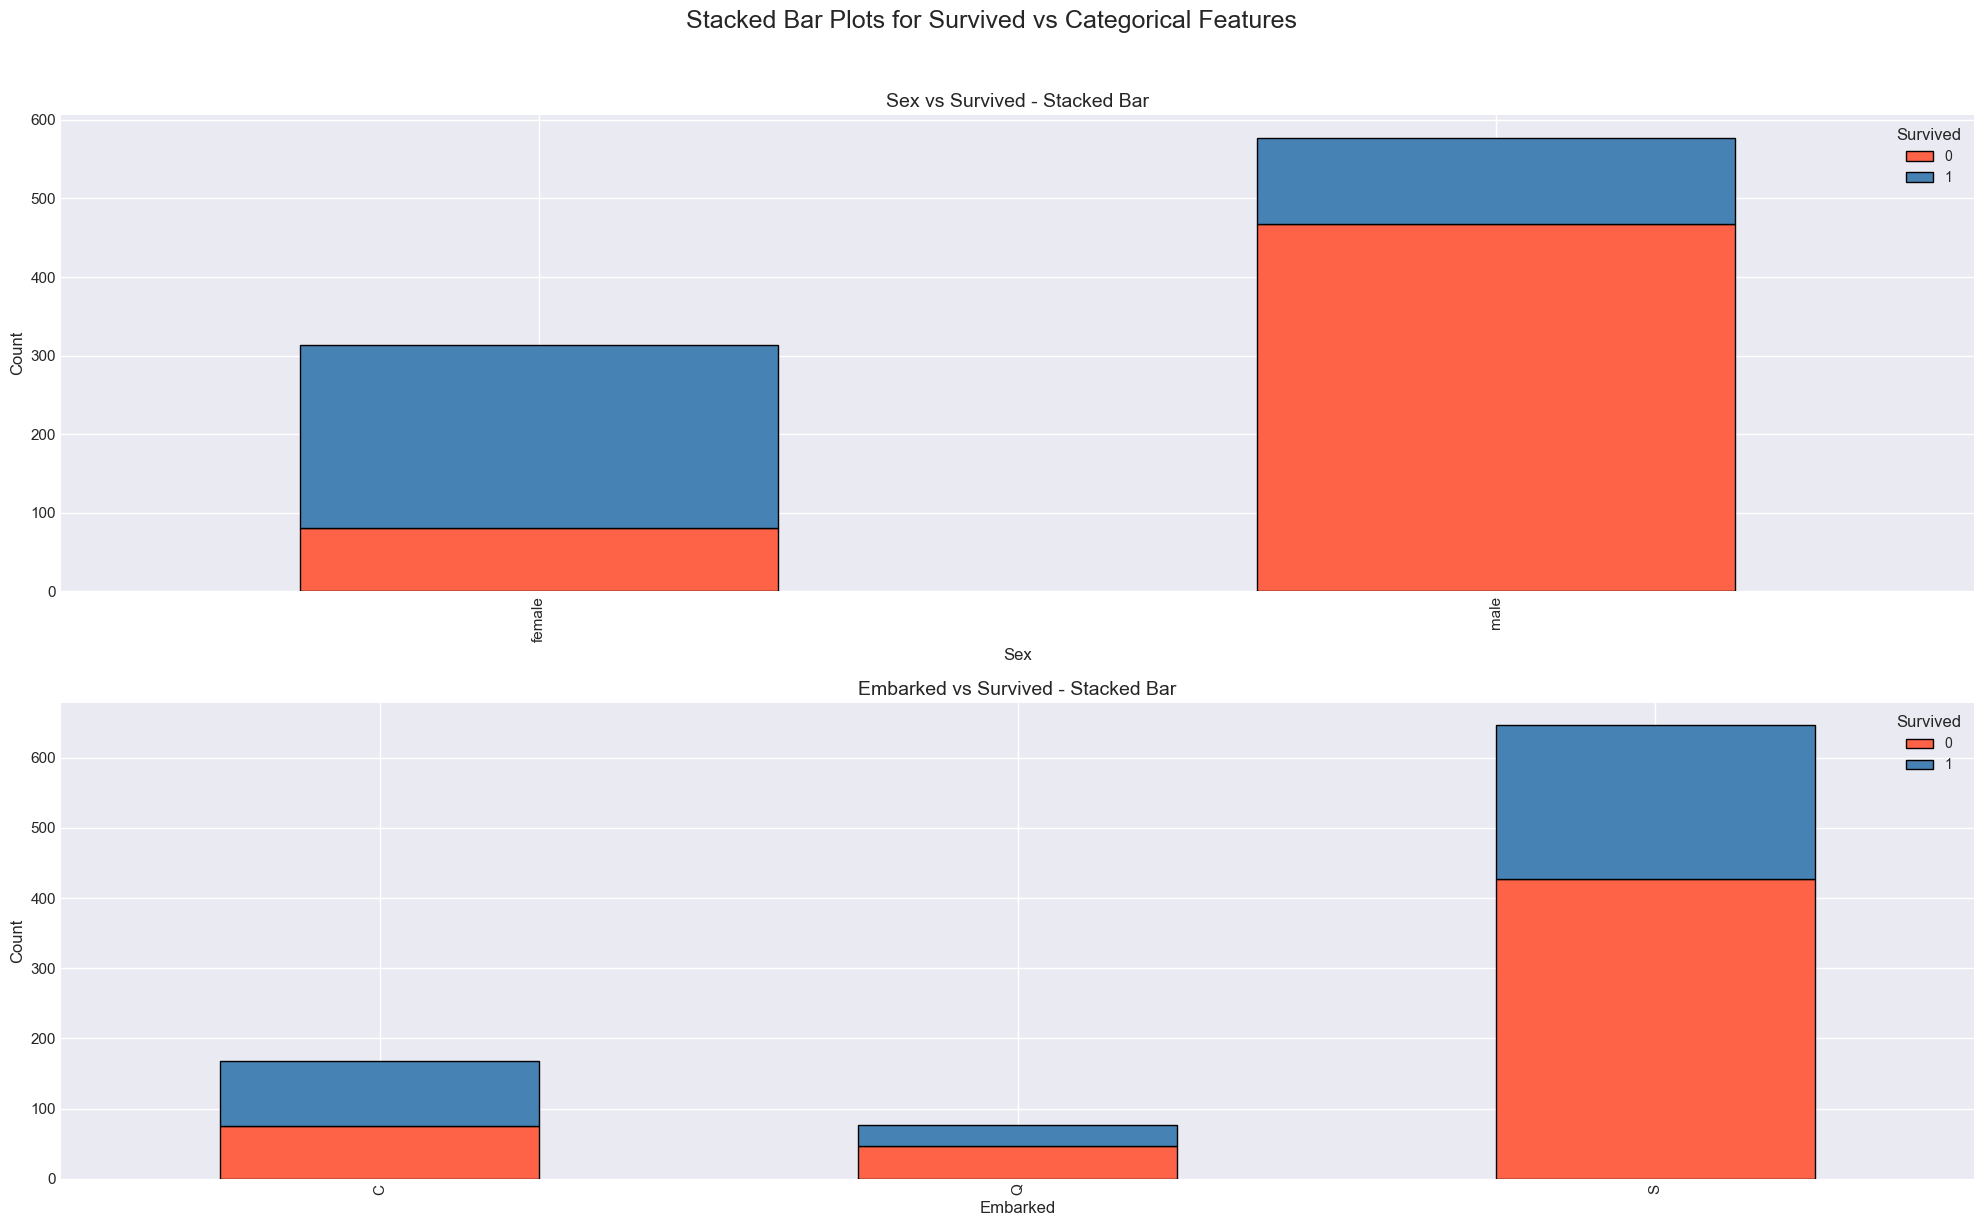

In [74]:
plot_stacked_bar(data= train_data,
                   features= categorical_features_train,
                   target= 'Survived')

### Pie charts

In [75]:
def plot_pie(data, features, figsize=(20, 12)):
    """
    Plot pie charts for the distribution of categories in each feature.

    Parameters:
    - data (pd.DataFrame): The dataset containing categorical features.
    - features (list): A list of categorical column names to plot.
    - figsize (tuple): The size of the figure (default is (20, 12)).

    Returns:
    None
    """
    n_features = len(features)
    fig, axes = plt.subplots(n_features, 1, figsize=figsize)
    fig.suptitle('Pie Charts for Categorical Feature Distributions', fontsize=18, y=1.02)

    for idx, feature in enumerate(features):
        data[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#FF6347', '#4682B4'],
                                          startangle=90, wedgeprops={'edgecolor': 'black'}, ax=axes[idx])
        axes[idx].set_title(f'{feature} Distribution - Pie Chart', fontsize=14)
        axes[idx].set_ylabel('')  # Hide the ylabel to make it cleaner

    plt.tight_layout()
    plt.show()

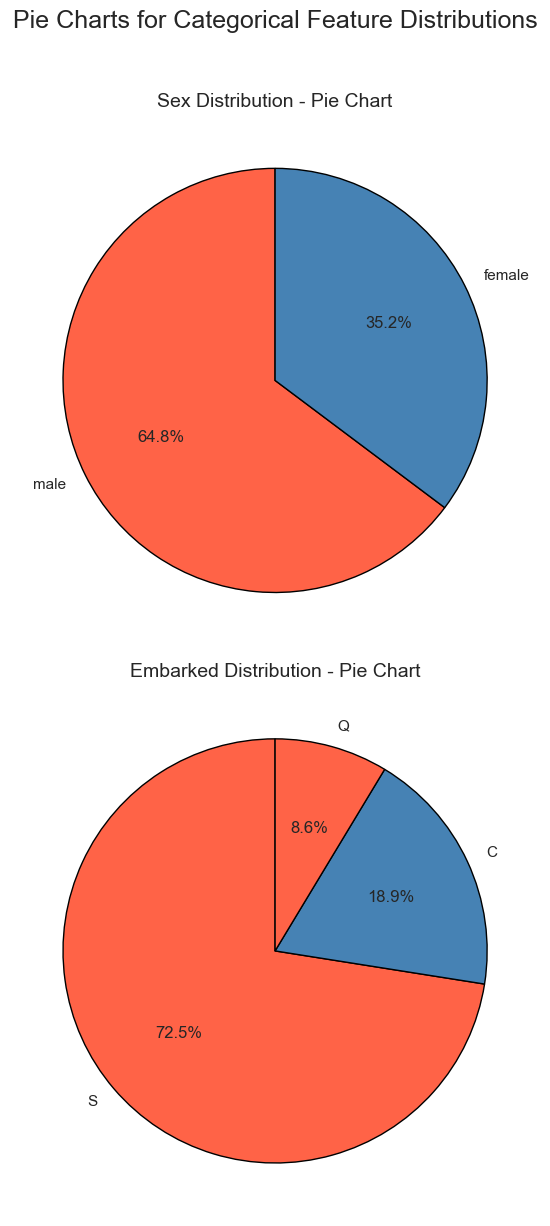

In [76]:
plot_pie(data= train_data,
        features= categorical_features_train)

- For XGBoost, you need to encode categorical features (either One-Hot Encoding or Label Encoding). For LightGBM, you can leave categorical features as they are, but you need to specify them in the categorical_feature parameter.

- so we will encode the categorical variables

---

### Encoding

In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
def label_encode_features(data, categorical_features):
    """
    Encode categorical features using Label Encoding.

    Parameters:
    - data (pd.DataFrame): The dataset containing the features.
    - categorical_features (list): List of categorical feature column names.

    Returns:
    - data (pd.DataFrame): The dataset with encoded categorical features.
    """
    label_encoder = LabelEncoder()
    for feature in categorical_features:
        data[feature] = label_encoder.fit_transform(data[feature])
    return data

In [79]:
train_data = label_encode_features(data= train_data,
                                   categorical_features= categorical_features_train)

In [80]:
test_data = label_encode_features(data= test_data,
                                  categorical_features= categorical_features_test)

In [81]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [82]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


- encoded successfully

### Saving the file

In [83]:
def save_cleaned_data(data, file_name):
    """
    Save the cleaned data as a CSV file.

    Parameters:
    - data (pd.DataFrame): The cleaned dataset.
    - file_name (str): The name of the CSV file to save the data to.

    Returns:
    - None
    """
    try:
        data.to_csv(file_name, index=False)
        print(f"Cleaned data has been saved to {file_name}")
    except Exception as e:
        print(f"Error saving the data: {e}")

In [84]:
save_cleaned_data(data= train_data,
                  file_name= 'cleaned_train_data.csv')

Cleaned data has been saved to cleaned_train_data.csv


In [85]:
save_cleaned_data(data= test_data,
                  file_name= ' Cleanedd_test_data.csv')

Cleaned data has been saved to  Cleanedd_test_data.csv
